In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('kidney_disease.csv')

In [3]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,157,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,...,39,7900,3.9,yes,yes,no,good,no,no,ckd
1,109,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,no,yes,no,good,no,no,ckd
2,17,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,no,no,poor,no,no,ckd
3,347,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,43,7200,5.5,no,no,no,good,no,no,notckd
4,24,42.0,100.0,1.015,4.0,0.0,normal,abnormal,notpresent,present,...,39,8300,4.6,yes,no,no,poor,no,no,ckd


ckd=chronic kidney disease

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [5]:
data.classification.unique()

array(['ckd', 'notckd', nan], dtype=object)

In [6]:
data.classification=data.classification.replace("ckd\t","ckd") 

In [7]:
data.classification.unique()

array(['ckd', 'notckd', nan], dtype=object)

In [8]:
data.drop('id', axis = 1, inplace = True)

In [9]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,122.0,...,39,7900,3.9,yes,yes,no,good,no,no,ckd
1,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,233.0,...,NaN,NaN,NaN,no,yes,no,good,no,no,ckd
2,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,114.0,...,NaN,NaN,NaN,yes,no,no,poor,no,no,ckd
3,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,108.0,...,43,7200,5.5,no,no,no,good,no,no,notckd
4,42.0,100.0,1.015,4.0,0.0,normal,abnormal,notpresent,present,NaN,...,39,8300,4.6,yes,no,no,poor,no,no,ckd


In [10]:
data['classification'] = data['classification'].replace(['ckd','notckd'], [1,0])

In [11]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,122.0,...,39,7900,3.9,yes,yes,no,good,no,no,1.0
1,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,233.0,...,NaN,NaN,NaN,no,yes,no,good,no,no,1.0
2,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,114.0,...,NaN,NaN,NaN,yes,no,no,poor,no,no,1.0
3,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,108.0,...,43,7200,5.5,no,no,no,good,no,no,0.0
4,42.0,100.0,1.015,4.0,0.0,normal,abnormal,notpresent,present,NaN,...,39,8300,4.6,yes,no,no,poor,no,no,1.0


In [12]:
data.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification    120
dtype: int64

In [13]:
df = data.dropna(axis = 0)
print(f"Before dropping all NaN values: {data.shape}")
print(f"After dropping all NaN values: {df.shape}")

Before dropping all NaN values: (400, 25)
After dropping all NaN values: (107, 25)


In [14]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,122.0,...,39,7900,3.9,yes,yes,no,good,no,no,1.0
3,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,108.0,...,43,7200,5.5,no,no,no,good,no,no,0.0
6,29.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,83.0,...,40,9900,4.7,no,no,no,good,no,no,0.0
10,56.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,132.0,...,45,7500,5.6,no,no,no,good,no,no,0.0
12,42.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,98.0,...,44,8400,5.5,no,no,no,good,no,no,0.0


In [15]:
df.index = range(0,len(df),1)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,122.0,...,39,7900,3.9,yes,yes,no,good,no,no,1.0
1,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,108.0,...,43,7200,5.5,no,no,no,good,no,no,0.0
2,29.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,83.0,...,40,9900,4.7,no,no,no,good,no,no,0.0
3,56.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,132.0,...,45,7500,5.6,no,no,no,good,no,no,0.0
4,42.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,98.0,...,44,8400,5.5,no,no,no,good,no,no,0.0


In [16]:
df['wc']=df['wc'].replace(["\t6200","\t8400"],[6200,8400])

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_9564\179227785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wc']=df['wc'].replace(["\t6200","\t8400"],[6200,8400])


In [17]:
for i in df['wc']:
    print(i)

7900
7200
9900
7500
8400
15700
10500
7900
7000
9600
6700
4300
4700
7200
9700
9800
5800
6400
15200
5600
8300
10500
26400
8100
6500
6700
7500
6800
5500
4500
6700
10700
11000
9400
6300
11000
10300
6200
6600
11000
5800
5400
15200
6400
7200
5400
6300
8400
6700
11500
10900
7000
5600
8600
6200
11000
8300
6700
10700
5200
7500
7300
7400
12800
9500
7400
9600
9400
9300
5000
11000
10500
7800
5800
8800
9300
9800
6300
6900
16700
4300
8600
12500
7000
7900
5000
7400
4300
5100
7500
6600
7200
18900
8100
9100
8200
5500
9100
6900
16300
6000
10500
6800
9200
14600
7200
7300


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             107 non-null    float64
 1   bp              107 non-null    float64
 2   sg              107 non-null    float64
 3   al              107 non-null    float64
 4   su              107 non-null    float64
 5   rbc             107 non-null    object 
 6   pc              107 non-null    object 
 7   pcc             107 non-null    object 
 8   ba              107 non-null    object 
 9   bgr             107 non-null    float64
 10  bu              107 non-null    float64
 11  sc              107 non-null    float64
 12  sod             107 non-null    float64
 13  pot             107 non-null    float64
 14  hemo            107 non-null    float64
 15  pcv             107 non-null    object 
 16  wc              107 non-null    object 
 17  rc              107 non-null    obj

In [18]:
df['pcv']=df['pcv'].astype(int)
df['wc']=df['wc'].astype(int)
df['rc']=df['rc'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             107 non-null    float64
 1   bp              107 non-null    float64
 2   sg              107 non-null    float64
 3   al              107 non-null    float64
 4   su              107 non-null    float64
 5   rbc             107 non-null    object 
 6   pc              107 non-null    object 
 7   pcc             107 non-null    object 
 8   ba              107 non-null    object 
 9   bgr             107 non-null    float64
 10  bu              107 non-null    float64
 11  sc              107 non-null    float64
 12  sod             107 non-null    float64
 13  pot             107 non-null    float64
 14  hemo            107 non-null    float64
 15  pcv             107 non-null    int32  
 16  wc              107 non-null    int32  
 17  rc              107 non-null    flo

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_9564\4219893708.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pcv']=df['pcv'].astype(int)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_9564\4219893708.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wc']=df['wc'].astype(int)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_9564\4219893708.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [19]:
object_dtypes = df.select_dtypes(include = 'object')
object_dtypes.head()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
0,normal,abnormal,notpresent,notpresent,yes,yes,no,good,no,no
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no
2,normal,normal,notpresent,notpresent,no,no,no,good,no,no
3,normal,normal,notpresent,notpresent,no,no,no,good,no,no
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no


In [21]:
dictonary = {
        "rbc": {
        "abnormal":1,
        "normal": 0,
    },
        "pc":{
        "abnormal":1,
        "normal": 0,
    },
        "pcc":{
        "present":1,
        "notpresent":0,
    },
        "ba":{
        "notpresent":0,
        "present": 1,
    },
        "htn":{
        "yes":1,
        "no": 0,
    },
        "dm":{
        "yes":1,
        "no":0,
    },
        "cad":{
        "yes":1,
        "no": 0,
    },
        "appet":{
        "good":1,
        "poor": 0,
    },
        "pe":{
        "yes":1,
        "no":0,
    },
        "ane":{
        "yes":1,
        "no":0,
    }
}

In [22]:
df=df.replace(dictonary)

In [23]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,62.0,70.0,1.025,3.0,0.0,0,1,0,0,122.0,...,39,7900,3.9,1,1,0,1,0,0,1.0
1,43.0,60.0,1.025,0.0,0.0,0,0,0,0,108.0,...,43,7200,5.5,0,0,0,1,0,0,0.0
2,29.0,80.0,1.020,0.0,0.0,0,0,0,0,83.0,...,40,9900,4.7,0,0,0,1,0,0,0.0
3,56.0,60.0,1.025,0.0,0.0,0,0,0,0,132.0,...,45,7500,5.6,0,0,0,1,0,0,0.0
4,42.0,80.0,1.020,0.0,0.0,0,0,0,0,98.0,...,44,8400,5.5,0,0,0,1,0,0,0.0


<AxesSubplot: >

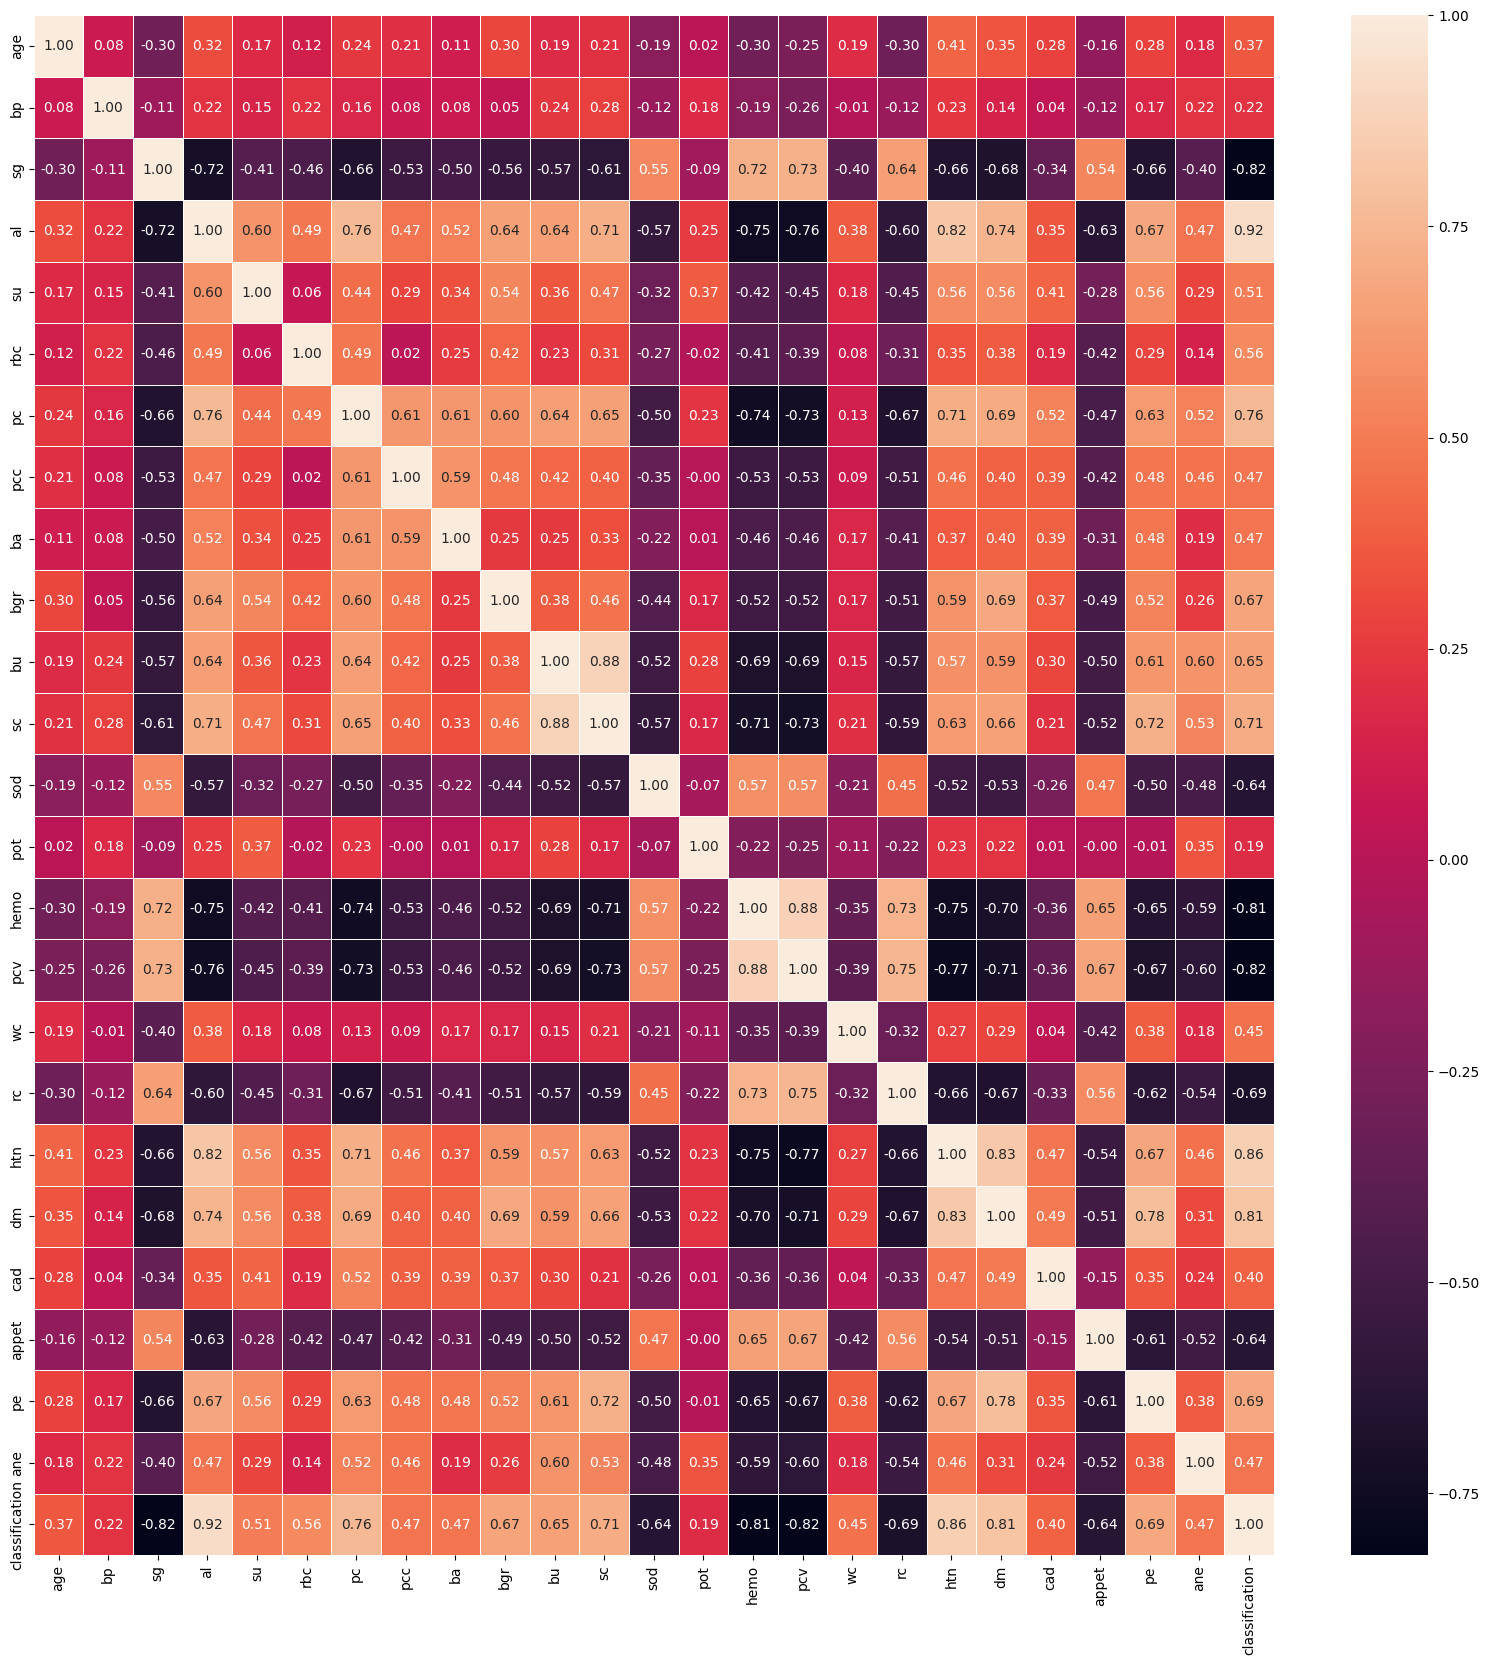

In [24]:
import seaborn as sns
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True, fmt=".2f",linewidths=0.5)

In [25]:
df.corr()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
age,1.000000,0.082668,-0.301660,0.319442,0.174373,0.121752,0.244595,0.206083,0.107992,0.295989,...,-0.252228,0.188417,-0.303991,0.406564,0.345971,0.281360,-0.158872,0.281478,0.179925,0.365299
bp,0.082668,1.000000,-0.107411,0.220998,0.153337,0.218505,0.162984,0.083999,0.083999,0.047253,...,-0.260199,-0.012574,-0.121332,0.231599,0.143273,0.043585,-0.121116,0.172827,0.216663,0.216974
sg,-0.301660,-0.107411,1.000000,-0.715003,-0.414423,-0.458482,-0.660213,-0.528488,-0.495611,-0.559075,...,0.728940,-0.395109,0.643012,-0.657071,-0.679199,-0.340374,0.541832,-0.658317,-0.396981,-0.822337
al,0.319442,0.220998,-0.715003,1.000000,0.596346,0.485001,0.760200,0.469044,0.519357,0.644863,...,-0.756601,0.379777,-0.597403,0.817089,0.738305,0.351833,-0.625474,0.673317,0.469044,0.922359
su,0.174373,0.153337,-0.414423,0.596346,1.000000,0.058202,0.438660,0.288151,0.335151,0.543467,...,-0.449192,0.179748,-0.445598,0.560508,0.563151,0.408256,-0.283321,0.563699,0.288151,0.506835
rbc,0.121752,0.218505,-0.458482,0.485001,0.058202,1.000000,0.486916,0.020776,0.254778,0.420887,...,-0.387035,0.082543,-0.306533,0.347253,0.375093,0.185009,-0.416181,0.289522,0.137777,0.555148
pc,0.244595,0.162984,-0.660213,0.760200,0.438660,0.486916,1.000000,0.611775,0.611775,0.597912,...,-0.733576,0.129229,-0.670272,0.709396,0.694017,0.524541,-0.472399,0.628098,0.518792,0.762051
pcc,0.206083,0.083999,-0.528488,0.469044,0.288151,0.020776,0.611775,1.000000,0.594697,0.478443,...,-0.533150,0.094600,-0.509262,0.456754,0.396330,0.394061,-0.416555,0.478652,0.459596,0.466204
ba,0.107992,0.083999,-0.495611,0.519357,0.335151,0.254778,0.611775,0.594697,1.000000,0.251900,...,-0.459047,0.165467,-0.412874,0.370254,0.396330,0.394061,-0.311185,0.478652,0.189394,0.466204
bgr,0.295989,0.047253,-0.559075,0.644863,0.543467,0.420887,0.597912,0.478443,0.251900,1.000000,...,-0.521506,0.165637,-0.505789,0.594772,0.687275,0.371521,-0.492577,0.522808,0.255806,0.665320


In [26]:
X = df.drop(['classification', 'sg', 'appet', 'rc', 'pcv', 'hemo', 'sod'], axis = 1)
Y = df['classification']

In [27]:
X.columns

Index(['age', 'bp', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc',
       'pot', 'wc', 'htn', 'dm', 'cad', 'pe', 'ane'],
      dtype='object')

In [28]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
data = scaler.fit_transform(X)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data, Y, test_size=0.3, stratify=Y, random_state=2)
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=0.5, stratify=Y_test, random_state=2)


In [54]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense

# Define the model
model = Sequential()
model.add(Dense(32, input_dim=18, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
# model.fit(X_train, Y_train, epochs=50, batch_size=8, validation_data=(X_val, Y_val))
model.fit(X_train, Y_train, epochs=25, batch_size=4, validation_data=(X_val, Y_val))


# Evaluate the model
accuracy = model.evaluate(X_test, Y_test)[1]

Epoch 1/25
22/22 [==============================] - 1s 14ms/step - loss: 0.7638 - accuracy: 0.7294 - val_loss: 0.7702 - val_accuracy: 0.7059
Epoch 2/25
22/22 [==============================] - 0s 4ms/step - loss: 0.6885 - accuracy: 0.7294 - val_loss: 0.7054 - val_accuracy: 0.7059
Epoch 3/25
22/22 [==============================] - 0s 4ms/step - loss: 0.6370 - accuracy: 0.7294 - val_loss: 0.6456 - val_accuracy: 0.7647
Epoch 4/25
22/22 [==============================] - 0s 5ms/step - loss: 0.5920 - accuracy: 0.7529 - val_loss: 0.5813 - val_accuracy: 0.7647
Epoch 5/25
22/22 [==============================] - 0s 5ms/step - loss: 0.5473 - accuracy: 0.7529 - val_loss: 0.5252 - val_accuracy: 0.7647
Epoch 6/25
22/22 [==============================] - 0s 4ms/step - loss: 0.4996 - accuracy: 0.7765 - val_loss: 0.4694 - val_accuracy: 0.7647
Epoch 7/25
22/22 [==============================] - 0s 4ms/step - loss: 0.4517 - accuracy: 0.8118 - val_loss: 0.4187 - val_accuracy: 0.8235
Epoch 8/25
22/22 [=

In [50]:
print(accuracy)

1.0


In [ ]:
# Saving model to disk
# pickle.dump(model, open('ckd_model.pkl','wb'))